XiEmulator | 05/15/2025 11:08:19 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/15/2025 11:08:19 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/15/2025 11:08:19 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/15/2025 11:08:19 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/15/2025 11:08:19 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
BaseEmulator | 05/15/2025 11:08:20 

05/15/2025 11:08:21 PM Plotting omega0
05/15/2025 11:08:21 PM Plotting omega0
05/15/2025 11:08:21 PM Plotting omega0
05/15/2025 11:08:21 PM Plotting omega0
05/15/2025 11:08:21 PM Plotting omega0
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
05/15/2025 11:09:13 PM Plotting omegab
05/15/2025 11:09:13 PM Plotting omegab
05/15/2025 11:09:13 PM Plotting omegab
05/15/2025 11:09:13 PM Plotting omegab
05/15/2025 11:09:13 PM Plotting omegab
05/15/2025 11:10:02 PM Plotting hubble
05/15/2025 11:10:02 PM Plotting hubble
05/15/2025 11:10:02 PM Plotting hubble
05/15/2025 11:10:02 PM Plotting hubble
05/15/2025 11:10:02 PM Plotting hubble
05/15/2025 11:10:53 PM Plotting scalar_amp
05/15/2025 11:10:53 PM Plotting scalar_amp
05/15/2025 11:10:53 PM Plotting scalar_amp
05/15/2025 11:10:53 PM Plotting scalar_amp
05/15/2025 11:10:53 PM Plotting scalar_amp
05/15/2025 11:11:43 PM Plotting n

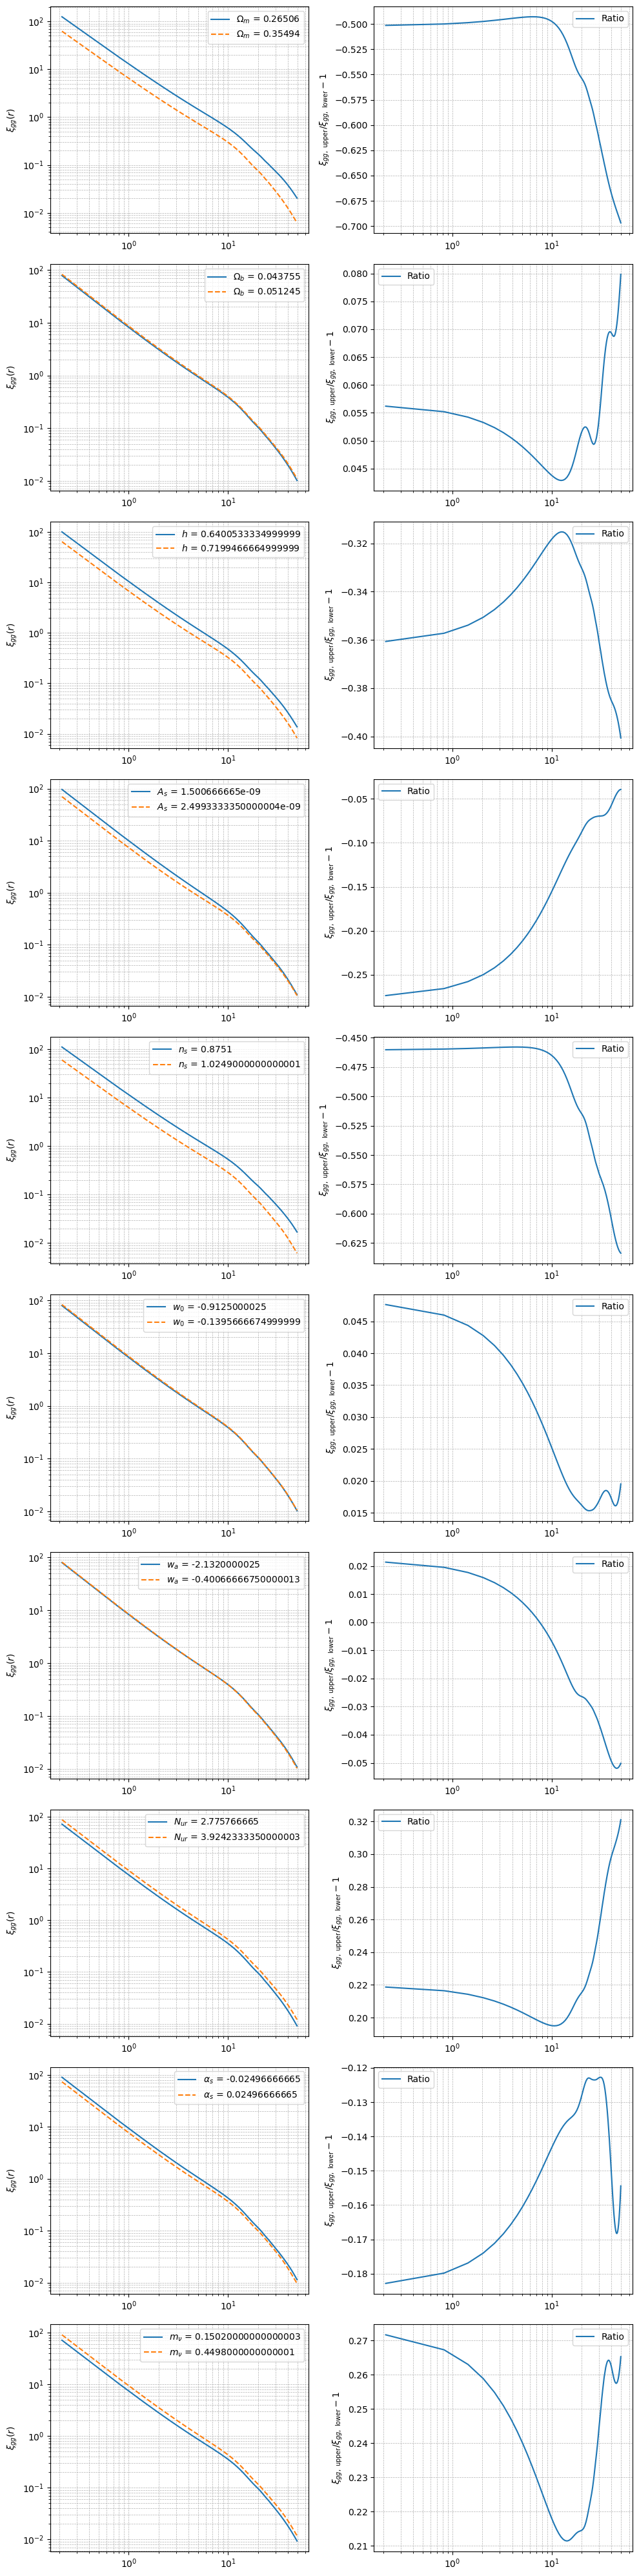

In [ ]:
import importlib
from gal_goku import plot_gal
importlib.reload(plot_gal)


plt_gal = plot_gal.PlotGal(logging_level='INFO')
plt_gal.xi_gg_cosmo_sensitivity()

2025-05-20 11:21:49.418656: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 11:21:49.421850: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 11:21:49.431202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747758109.446566 1210505 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747758109.451191 1210505 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747758109.464024 1210505 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

XiEmulator | 05/20/2025 11:21:52 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl


2025-05-20 11:21:52.309241: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


BaseEmulator | 05/20/2025 11:21:53 AM | INFO  |  Loading the hmf emulator from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/hmf_emu_combined_inducing_500_latents_20_leave31.pkl


05/20/2025 11:21:53 AM Plotting omega0
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
05/20/2025 11:22:47 AM Plotting omegab
05/20/2025 11:23:37 AM Plotting hubble
05/20/2025 11:24:26 AM Plotting scalar_amp
05/20/2025 11:25:16 AM Plotting ns
05/20/2025 11:26:05 AM Plotting w0_fld
05/20/2025 11:26:55 AM Plotting wa_fld
05/20/2025 11:27:44 AM Plotting N_ur
05/20/2025 11:28:34 AM Plotting alpha_s
05/20/2025 11:29:24 AM Plotting m_nu


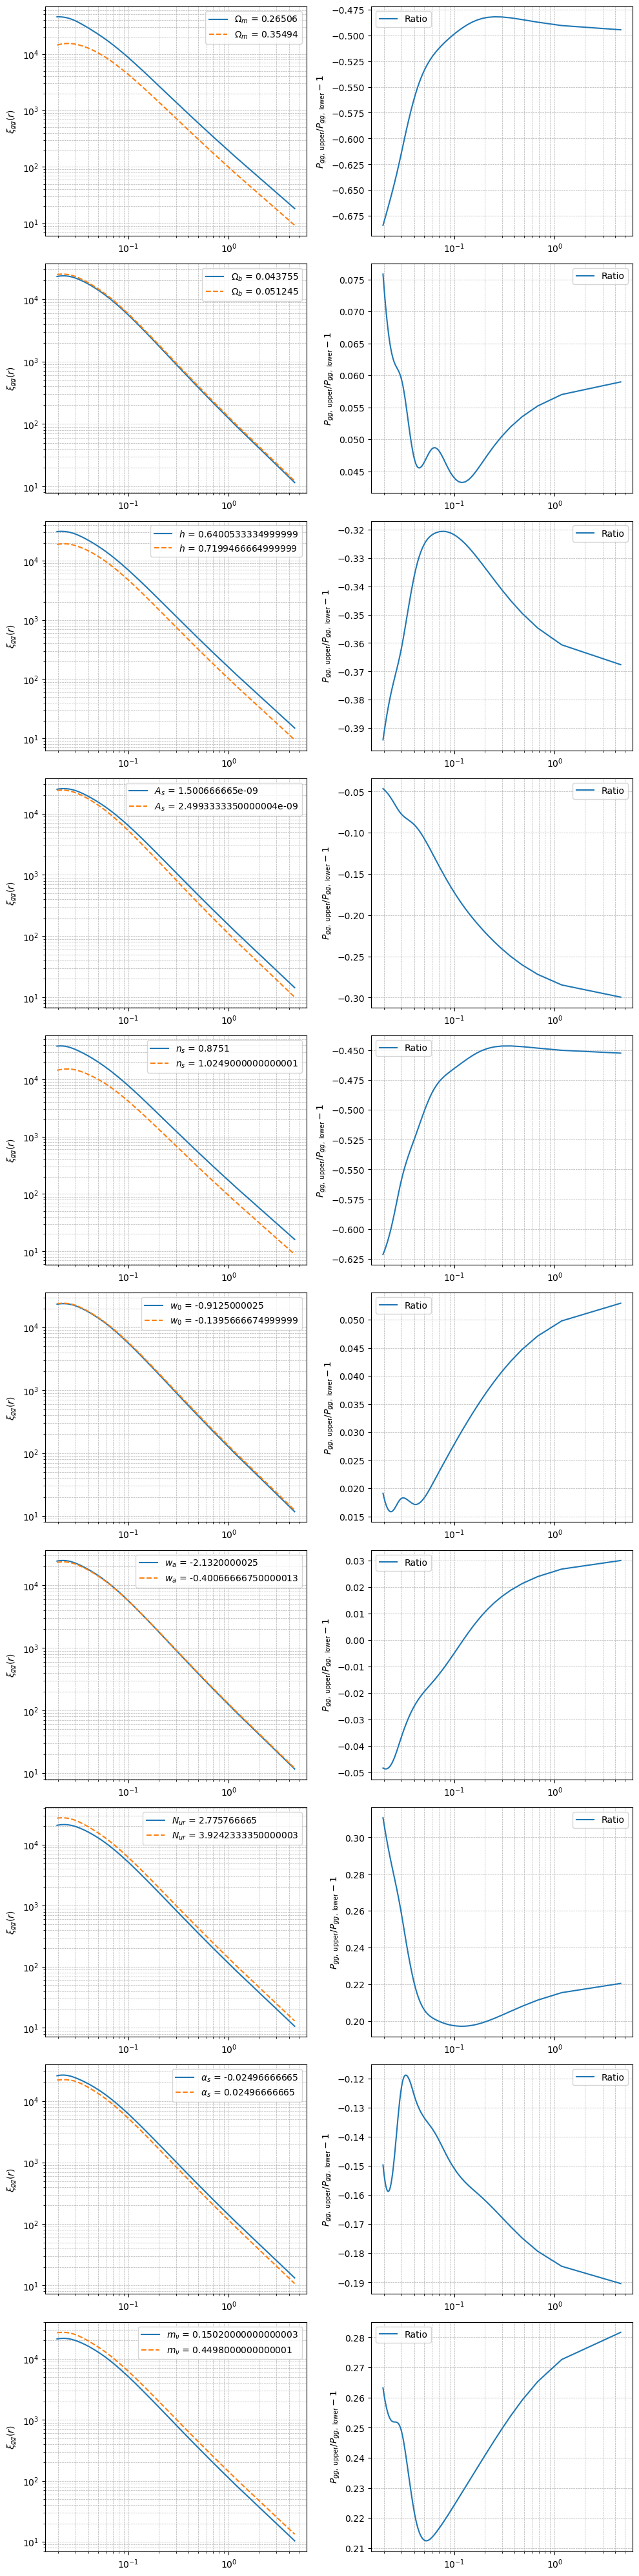

In [1]:
import importlib
from gal_goku import plot_gal
importlib.reload(plot_gal)


plt_gal = plot_gal.PlotGal(logging_level='INFO')
plt_gal.pk_gg_cosmo_sensitivity()

XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


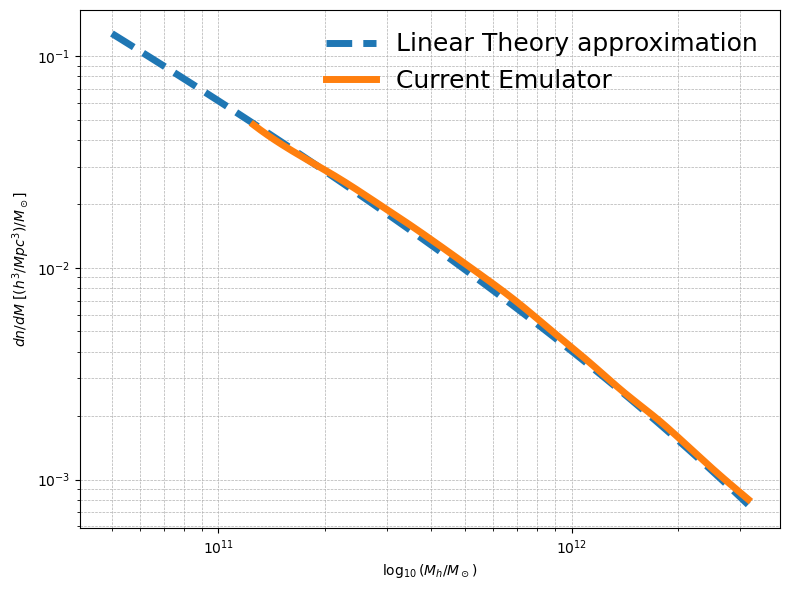

In [34]:
import importlib
from gal_goku import plot_gal
importlib.reload(plot_gal)


plt_gal = plot_gal.PlotGal(logging_level='INFO')
plt_gal.dndm_planck18()